In [78]:
import torch
from models import CNNClassifier

model = CNNClassifier()

model.load_state_dict(torch.load('../output/cnn_model_100.pt'))

<All keys matched successfully>

In [79]:
import torchvision
dataset = torchvision.datasets.MNIST(
        root='../data',
        train=True,
        transform=torchvision.transforms.ToTensor(),
        download=True

    )

(-0.5, 27.5, 27.5, -0.5)

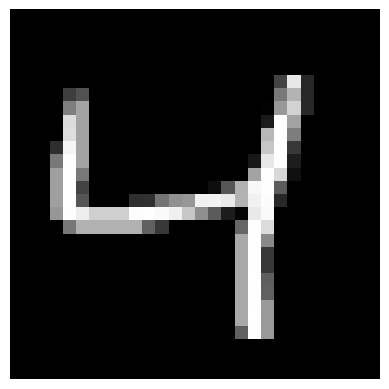

In [80]:
import matplotlib.pyplot as plt

img = dataset[2][0].numpy().reshape(28,28)

plt.imshow(img, cmap='gray')
plt.axis('off')

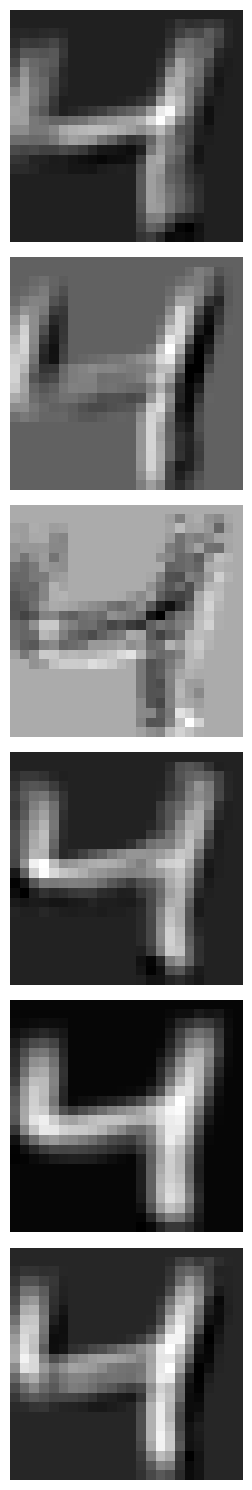

In [81]:
conv1 = model.conv1(dataset[2][0].unsqueeze(0))
imgs1 =conv1.detach().numpy().reshape(6,24,24)

fig, axs = plt.subplots(6, 1, figsize=(3, 15))
for i in range(6):
    axs[i].imshow(imgs1[i], cmap='gray')
    axs[i].axis('off')

fig.tight_layout()

plt.show()

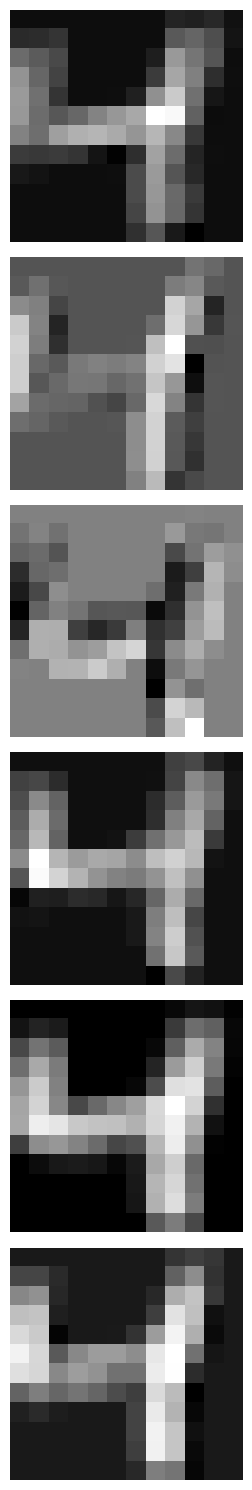

In [82]:
pool1 = model.pool(conv1)
imgs2 =pool1.detach().numpy().reshape(6,12,12)

fig, axs = plt.subplots(6, 1, figsize=(3, 15))
for i in range(6):
    axs[i].imshow(imgs2[i], cmap='gray')
    axs[i].axis('off')

fig.tight_layout()

plt.show()

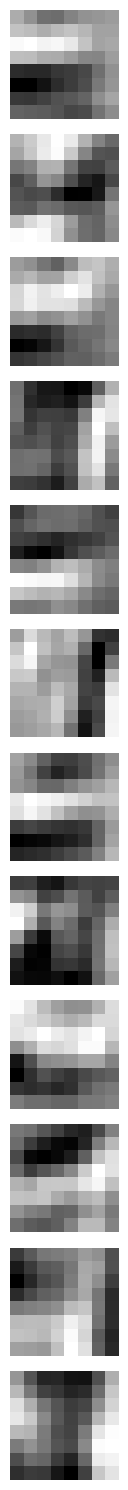

In [83]:
conv2 = model.conv2(pool1)
imgs3 =conv2.detach().numpy().reshape(12,8,8)

fig, axs = plt.subplots(12, 1, figsize=(3, 15))
for i in range(12):
    axs[i].imshow(imgs3[i], cmap='gray')
    axs[i].axis('off')

fig.tight_layout()

plt.show()

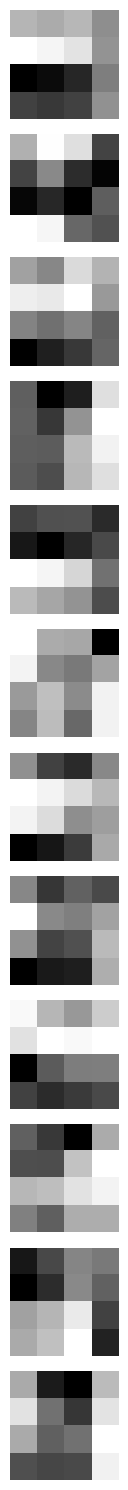

In [90]:
pool2 = model.pool(conv2)
imgs4 =pool2.detach().numpy().reshape(12,4,4)

fig, axs = plt.subplots(12, 1, figsize=(3, 15))
for i in range(12):
    axs[i].imshow(imgs4[i], cmap='gray')
    axs[i].axis('off')

fig.tight_layout()

plt.show()

In [85]:
f = model.flat(pool2)


plt.imshow(f.detach().numpy(), cmap='gray')
plt.axis('off')
plt.figure().set_size_inches(3, 15)
plt.figure().tight_layout()
plt.title("Flatten Layer Output")
plt.show()

<Figure size 300x1500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

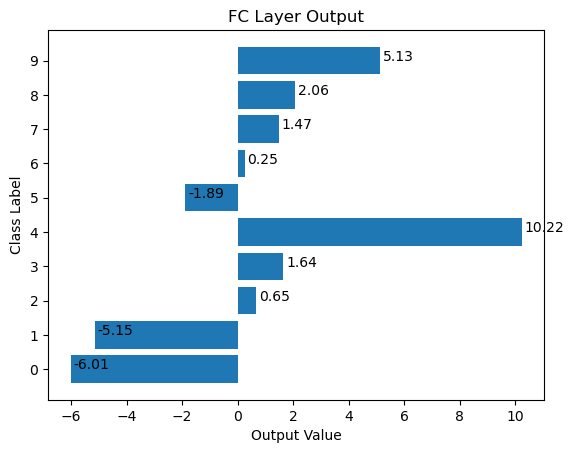

In [86]:
import matplotlib.pyplot as plt

out = model.fc(f)

energy = out.detach().numpy()[0]

x = range(10)

plt.barh(x, energy)
for i, value in enumerate(energy):
    plt.text(value + 0.1, x[i], f"{value:.2f}", ha='left')

plt.yticks(x, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title("FC Layer Output")
plt.xlabel('Output Value')
plt.ylabel('Class Label')

plt.show()

/home/zisissour/miniconda3/envs/cnn/lib/python3.12/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


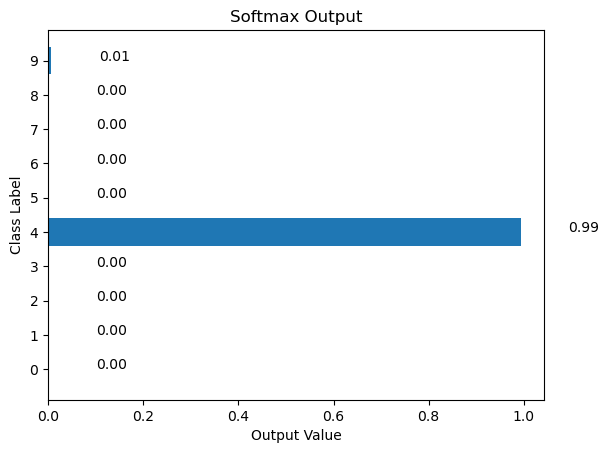

In [88]:
from torch.nn import Softmax

s = Softmax()
prob = s(out).detach().numpy()[0]

x = range(10)

plt.barh(x, prob)
for i, value in enumerate(prob):
    plt.text(value + 0.1, x[i], f"{value:.2f}", ha='left')

plt.yticks(x, ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title("Softmax Output")
plt.xlabel('Output Value')
plt.ylabel('Class Label')

plt.show()